### **Four datas of meat process**

In [40]:
import pandas as pd
data1 = pd.read_csv("Datathon Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv")
deheader = data1.loc[data1['Category'] != 'Header']
# deheader.head(20)

读取数据

In [41]:
import pandas as pd
data2 = pd.read_csv('Datathon Data/Meat_Stats_Cold_Storage.csv')
data3 = pd.read_csv('Datathon Data/Meat_Stats_Meat_Production.csv')
data4 = pd.read_csv('Datathon Data/Meat_Stats_Slaughter_Counts.csv')
data5 = pd.read_csv('Datathon Data/Meat_Stats_Slaughter_Weights.csv')

data4.head(5)

,Unnamed: 0,Date,Year,Month,Unit,Animal,Amount,Commercial_Or_Federally_Inspected,Type_Of_Meat
0,0,Dec-2023,2023,12,"1,000 Head",Cattle,2593.4,Commercial,Red Meat
1,1,Nov-2023,2023,11,"1,000 Head",Cattle,2729.9,Commercial,Red Meat
2,2,Oct-2023,2023,10,"1,000 Head",Cattle,2826.0,Commercial,Red Meat
3,3,Sep-2023,2023,9,"1,000 Head",Cattle,2610.6,Commercial,Red Meat
4,4,Aug-2023,2023,8,"1,000 Head",Cattle,2890.0,Commercial,Red Meat


统一主数据列名为Amount，方便统一编写函数

In [42]:
def replace_columns(data,name):
    ans = []
    for i in list(data.columns):
        if i == name:
            ans.append('Amount')
        else:
            ans.append(i)
    data.columns = ans
    Counts = []
    for i in list(data['Amount']):
        Counts.append(float(str(i).replace(',','')))
    data['Amount'] = Counts

replace_columns(data2,'Weight')
replace_columns(data3,'Production')
replace_columns(data4,'Count')
replace_columns(data5,'Weight')

data4.head(5)


,Unnamed: 0,Date,Year,Month,Unit,Animal,Amount,Commercial_Or_Federally_Inspected,Type_Of_Meat
0,0,Dec-2023,2023,12,"1,000 Head",Cattle,2593.4,Commercial,Red Meat
1,1,Nov-2023,2023,11,"1,000 Head",Cattle,2729.9,Commercial,Red Meat
2,2,Oct-2023,2023,10,"1,000 Head",Cattle,2826.0,Commercial,Red Meat
3,3,Sep-2023,2023,9,"1,000 Head",Cattle,2610.6,Commercial,Red Meat
4,4,Aug-2023,2023,8,"1,000 Head",Cattle,2890.0,Commercial,Red Meat


时间序列折线图绘制函数

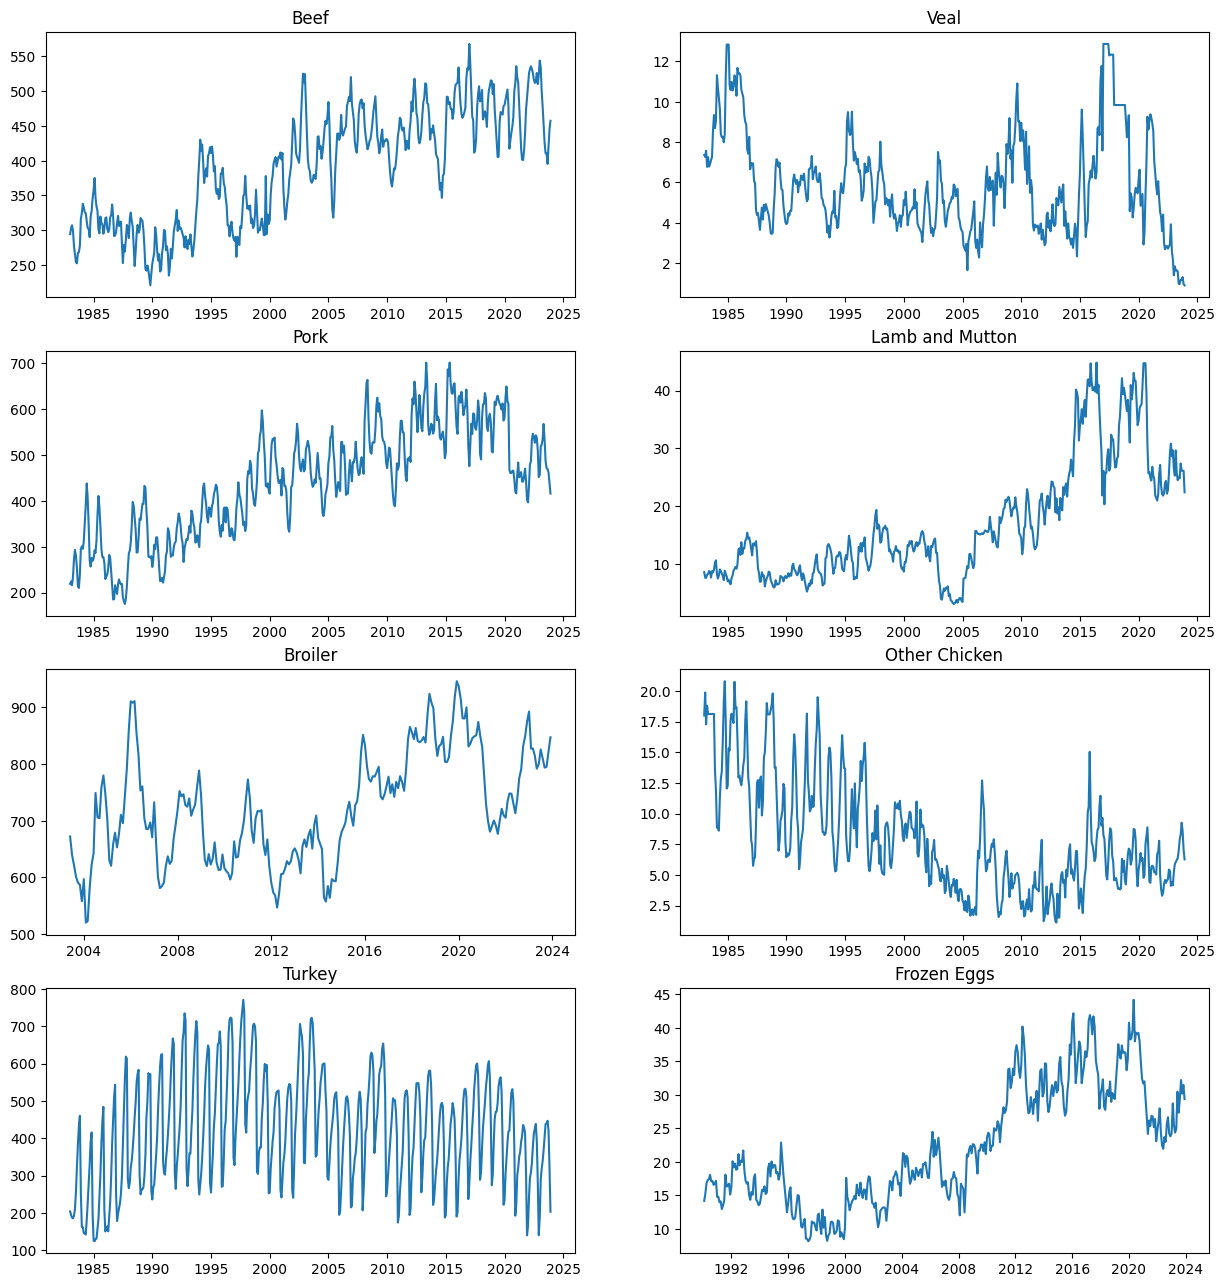

In [43]:
import matplotlib.pyplot as plt
import datetime as dt

def plot_strange(data):
    uniq = data['Animal'].unique()
    n = len(uniq)
    
    fig = plt.figure(figsize=(15,2.5*n))
    
    for i in range(n):
        datanew = data.loc[data['Animal'] == uniq[i]]
        x = []
        for k in range(datanew.shape[0]):
            strk = '{}-{}'.format(list(datanew['Year'])[k],list(datanew['Month'])[k])
            x.append(dt.datetime.strptime(strk,'%Y-%m'))
        
        y = datanew['Amount']
        ax = fig.add_subplot(n//2+1,2, i+1)
        # print(len(x),len(y),x[0])
        # x=[i for i in range(2024)], [1]*2024
        ax.plot(x,y)
        ax.set_title(data['Animal'].unique()[i])
    plt.show()

plot_strange(data2)


箱线图绘制函数

In [44]:
def animal_boxplot(data):
    uniq = data['Animal'].unique()
    n = len(uniq)
    fig = plt.figure(figsize=(12,2*n))
    for i in range(n):
        datanew = data.loc[data['Animal'] == uniq[i]]
        y = datanew['Amount']
        # print(uniq[i],y.describe())
        ax = fig.add_subplot(n//3+1,3, i+1)
        ax.boxplot(y.dropna())
        ax.set_title(uniq[i])
    plt.show()


绘制data4的箱线图

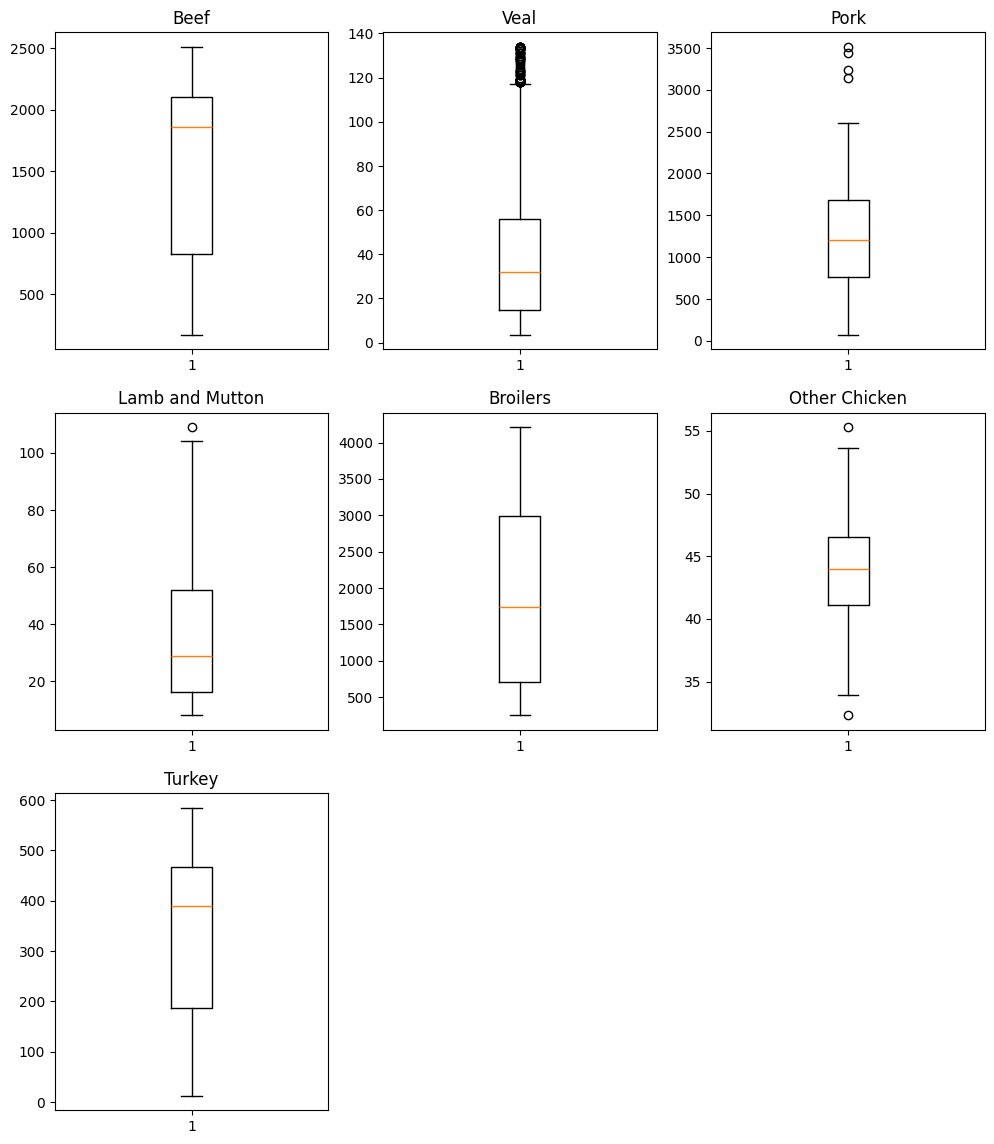

In [51]:
animal_boxplot(data3)

发现有异常值，去除异常值。

In [46]:
def drop_strange(data):
    uniq = data['Animal'].unique()
    n = len(uniq)
    # fig = plt.figure(figsize=(12,2*n))
    dic_data = dict()
    for i in range(n):
        datanew = data.loc[data['Animal'] == uniq[i]]
        y = datanew['Amount']
        IQR = y.quantile(0.75) - y.quantile(0.25)
        dic_data[uniq[i]] = (y.median()-2.5*IQR , y.median()+2.5*IQR) # 波动区间
    for k in range(data.shape[0]):
        if data.loc[k,'Animal'] == 'Turkeys':
            continue
        intercept = dic_data[data['Animal'][k]]
        if (data.loc[k,'Amount']< intercept[0] or data.loc[k,'Amount'] > intercept[1]):
            data.loc[k,'Amount'] = data.loc[k-1,'Amount'] if data.loc[k-1,'Animal']== data.loc[k,'Animal'] else data.loc[k+1,'Amount']

drop_strange(data2)
drop_strange(data3)
drop_strange(data4)
drop_strange(data5)


In [47]:
data3.describe()

,Year,Month,Amount
count,13595.000000,13595.000000,9611.000000
mean,1972.003751,6.500405,758.000624
std,29.731107,3.451984,888.798790
min,1921.000000,1.000000,3.500000
25%,1946.000000,4.000000,39.000000
50%,1972.000000,7.000000,389.000000
75%,1998.000000,9.500000,1414.000000
max,2023.000000,12.000000,4211.000000


再次绘制data4的箱线图查看情况:

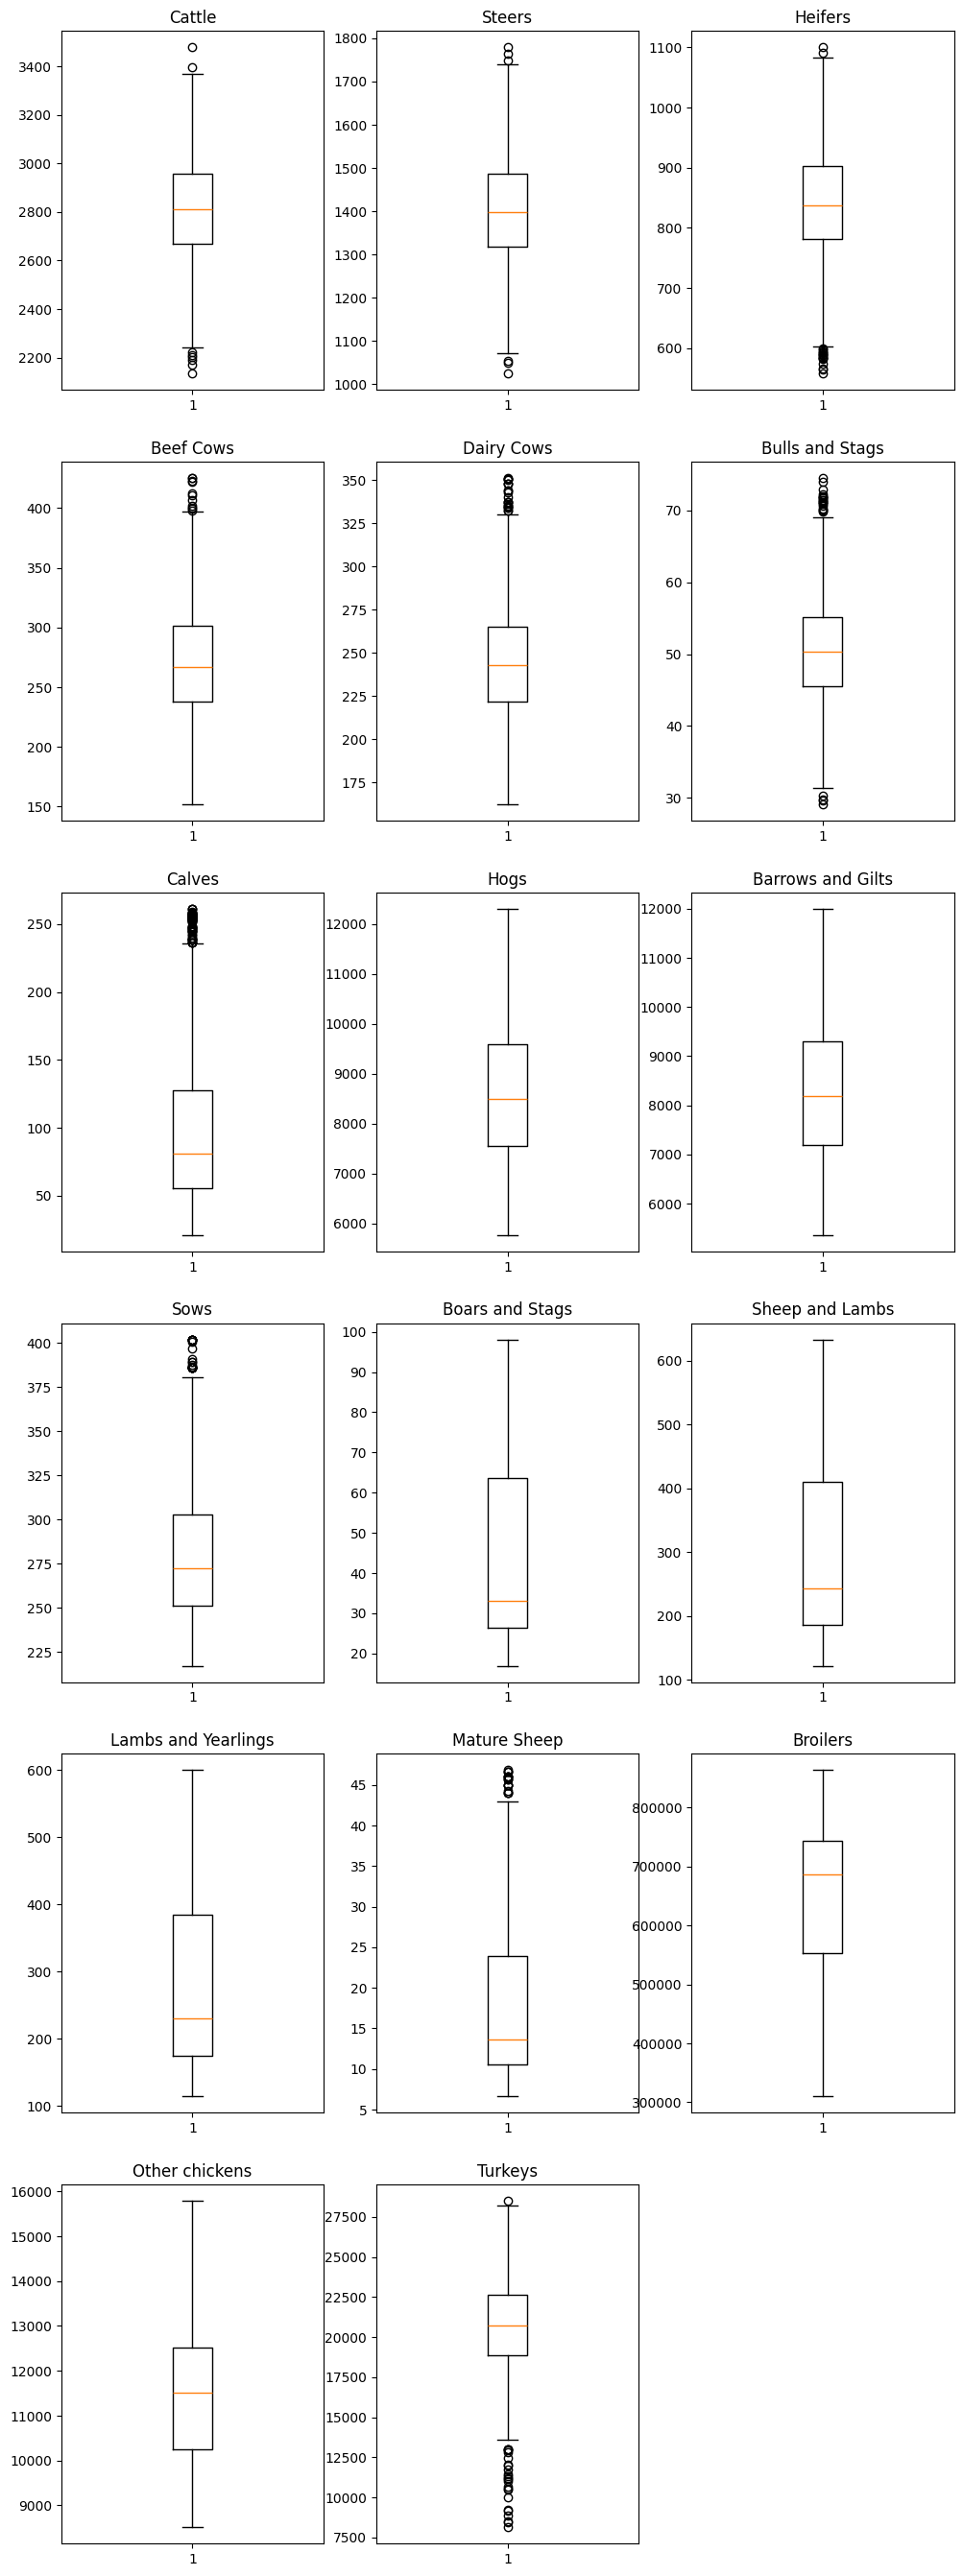

In [48]:
animal_boxplot(data4)

↑正常了好多

保存csv：


In [52]:
# data2.to_csv(path_or_buf = "C:/Users/Zhang/Desktop/python/Citadel/Datathon Data/Meat_Stats_Cold_Storage.csv")
data3.to_csv(path_or_buf = "C:/Users/Zhang/Desktop/python/Citadel/Datathon Data/Meat_Stats_Meat_Production.csv")
# data4.to_csv(path_or_buf = "C:/Users/Zhang/Desktop/python/Citadel/Datathon Data/Meat_Stats_Slaughter_Counts.csv")
# data5.to_csv(path_or_buf = "C:/Users/Zhang/Desktop/python/Citadel/Datathon Data/Meat_Stats_Slaughter_Weights.csv")